In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img)

In [3]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [4]:
# 清洗锐化图片
def cleaning(img):
    bgr = cv2.split(img)
    bgrNew = []
    for c in bgr:
        c = cv2.threshold(c,127,255,cv2.THRESH_BINARY)
        bgrNew.append(c[1])
    img = cv2.merge(bgrNew)
    return img

hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
cleaning(hand)
cv2.imwrite("/Users/tanjun/Desktop/tanjun/opencv/hand.png",hand)

True

In [5]:
# 边缘检测能检测边缘，但边缘是不连续的，图像轮廓是值将边缘连接起来形成的一个整体
# cv2.findContours()：查找图像轮廓信息
# cv2.drawContours()：能将轮廓绘制出来

# 12.1 查找并绘制轮廓

### 12.1.1 查找轮廓：findContours函数

In [6]:
# image,contours,hierarchy = cv2.findContours(image,mode,method)
# image：与函数参数中的image一样
# contours：返回的轮廓
# hierarchy：图像的拓扑信息（轮廓的层次）
# image：原始图像。8位单通道图像，所有非0值被处理成1，0不变，也就是说灰度图像会被自动处理成二值图。
# 实际操作中可根据需要，预先使用阈值处理等函数将待查找轮廓图像处理为二值图
# mode：轮廓检索模式
# method：轮廓的近似方法

# 返回值image：
# 与参数一致，就是原始图像，在opencv 4.X中，该返回值已经被取消
# contours,hierarchy = cv2.findContours(image,mode,method)

# 返回值contours：
# 是一组轮廓信息，每个轮廓都由若干个点组成
# contours的基本属性：
# 1）type属性：
# 返回值的type属性是list类型，list中每个元素是图像中一个轮廓，轮廓是Numpy中的ndarray类型
# 2）轮廓的个数：
# 用len(contours)语句获取轮廓个数
# 3）每个轮廓的点数：
# 用len(contours[0])语句获取每个轮廓的点数，contours[0].shape获取每个轮廓内点的shape属性
# 4）轮廓内的点：
# 用contours[0]获取第0个轮廓中具体点

# 返回值hierarchy:
# 图像内轮廓可能位于不同位置，如一个轮廓在另一个轮廓内部，那么外轮廓称为父轮廓，内轮廓称为子轮廓，这种关系被称为层次（组织结构）
# 返回值hierarchy就包含了上述层次关系
# 每个轮廓contours[i]对应4个元素来说明当前轮廓的层次关系：
# [Next,Previous,First_Child,Parent]
# Next：后一个轮廓的索引编号
# Previous：前一个轮廓的索引编号
# First_Child：第一个子轮廓的索引编号
# Parent：父轮廓的索引编号
# 如果上述个参数对应的关系为空，也就是说没有对应关系时，则该参数所对应的值为-1
# 使用print(hierarchy)语句可以查看hierarchy值
# 注意：轮廓层次结构是由参数mode决定的，不同的mode，得到的轮廓编号不一样，得到的hierarchy也不一样

# 参数image：
# 必须是8位单通道二值图，一般都将图像处理为二值图后，再作为image参数使用

# 参数mode：
# 决定了轮廓提取方式，4中：
# cv2.RETR_EXTERNAL：值检测外部轮廓
# cv2.RETR_LIST：对检测到的轮廓不建立等级关系
# cv2.RETR_CCOMP：检测所有轮廓，并将它们组织成两级层次结构，
# 上面一层为外边界，下面一层为内孔的边界，如果内孔还有一个联通物体，则这个物体的外边界仍然位于顶层
# cv2.RETR_TREE：建立一个等级树结构的轮廓

# 参数method：
# 决定了如何表达轮廓，值如下：
# cv2.CHAIN_APPROX_NONE：存储所有轮廓点，相邻两个点的像素位置差不超过1，即max(abs(x1-x2),abs(y1-y2))=1
# cv2.CHAIN_APPROX_SIMPLE：压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如极端情况下，一个矩形4个点表示轮廓
# cv2.CHAIN_APPROX_TC89_L1：使用teh-Chinl chain近似算法的一种风格
# cv2.CHAIN_APPROX_TC89_KCOS：使用teh-Chinl chain近似算法的一种风格

# 使用findContours()查找轮廓时注意以下问题：
# 输入图像必须是灰度二值图
# opencv中都是从黑色背景中查找白色对象，因此对象必须是白色的，背景必须是黑色的
# opencv 4.x中只返回两个值

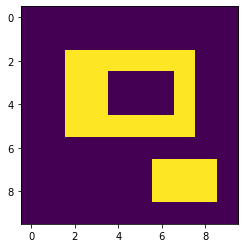

In [7]:
# 1.cv2.RETR_EXTERNAL
img = np.zeros([10,10],dtype=np.uint8)
img[2:6,2:8] = 1
img[7:9,6:9] = 1
img[3:5,4:7] = 0
img_show(img)

In [8]:
contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
# [ 1 -1 -1 -1]：表示第0个轮廓的层次，后一个是第1个，前一个不存在，第一个子轮廓不存在，父轮廓不存在
# [-1  0 -1 -1]：表示第1个轮廓的层次，后一个不存在，前一个是0，第一个子轮廓不存在，父轮廓不存在
# 此时轮廓间关系为：0-1

[[[ 1 -1 -1 -1]
  [-1  0 -1 -1]]]


In [9]:
# 2.cv2.RETR_LIST
contours,hierarchy = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
# 此时轮廓间关系为：0-1-2

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


In [10]:
# 3.cv2.RETR_CCOMP
contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
# 此时轮廓间关系为：0-1
#                  |
#                  2

[[[ 1 -1 -1 -1]
  [-1  0  2 -1]
  [-1 -1 -1  1]]]


In [11]:
# 4.cv2.RETR_TREE
contours,hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
# 此时轮廓间关系为：0-1
#                  |
#                  2

[[[ 1 -1 -1 -1]
  [-1  0  2 -1]
  [-1 -1 -1  1]]]


### 12.1.2 绘制图像轮廓：drawContours函数

In [12]:
# image = cv2.drawContours(image,contours,contourIdx,color[,thickness[,lineType[,hierarchy[,maxLevel[,offest]]]]])
# 返回值：
# image：目标图像，即绘制了边缘的原始图像
# 参数：
# image：待绘制轮廓的图像。注意，该函数会在image上直接绘制图像，如原始image还有他用，需复制一份出来
# contours：需绘制的轮廓，list类型
# contourIdx：需要绘制的边缘索引，告诉函数要绘制某一条轮廓还是全部轮廓，-1代表绘制全部轮廓
# color：绘制的颜色，RGB格式表示
# thickness：可选，画笔粗细，值为-1表示绘制实心轮廓
# lineType：可选，表示绘制轮廓选用的线型
# hierarchy：层次信息
# maxLevel：控制所绘制轮廓层次的深度
# offset：偏移参数，该参数使轮廓偏移到不同的位置展示出来
# 函数cv2.drawContour()的参数image和返回值image在运算后的值是相同的，因此可以将函数cv2.drawContours()写成没有返回值的形式

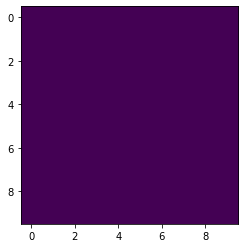

In [13]:
img = np.zeros([10,10],dtype=np.uint8)
img_show(img)

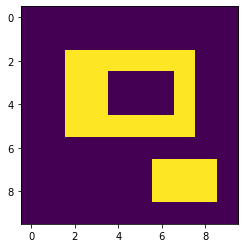

In [14]:
cv2.drawContours(img,contours,-1,(255,255,255))
img_show(img)

### 12.1.3 轮廓实例

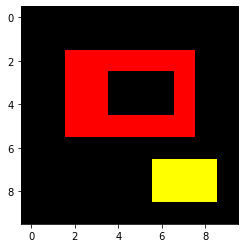

In [15]:
# 逐个显示图像内的边缘信息
img = np.zeros([10,10,3],dtype=np.uint8)
img[2:6,2:8,0] = 0
img[2:6,2:8,1] = 0
img[2:6,2:8,2] = 255
img[7:9,6:9,0] = 0
img[7:9,6:9,1] = 255
img[7:9,6:9,2] = 255
img[3:5,4:7,0] = 0
img[3:5,4:7,1] = 0
img[3:5,4:7,2] = 0
img_show(img)

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,binary = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

n = len(contours)
contoursImg = []
for i in range(n):
    temp = np.zeros(img.shape,np.uint8)
    contoursImg.append(cv2.drawContours(temp,contours,i,(255,255,255),1))

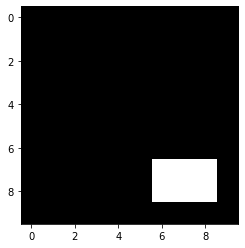

In [17]:
img_show(contoursImg[0])

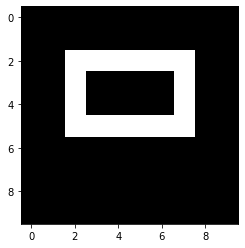

In [18]:
img_show(contoursImg[1])

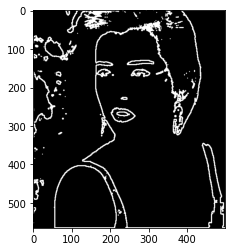

In [19]:
# 使用轮廓绘制功能提取前景图像
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
gray = cv2.cvtColor(wzx,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,bierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros(wzx.shape,np.uint8)
cv2.drawContours(mask,contours,-1,(255,255,255),2)
img_show(mask)

# 12.2 矩特征

In [20]:
# 比较两个轮廓最简单的方法是比较二者的轮廓矩
# 轮廓矩代表了一个轮廓，一幅图像，一组点集的全部特征
# 矩特征包含了对应对象不同类型的几何特征，如大小，位置，角度，形状等
# 矩特征被广泛应用在模式识别，图像识别等方面

### 12.2.1 矩的计算：moments函数

In [21]:
# opencv使用函数cv2.momoents()来获取轮廓的特征--轮廓矩
# retval = cv2.momoents(array[binaryImage])
# array：可以是点集，也可是灰度图像或者二值图像。当array是点集时，函数会把这些点集当成轮廓中的定点，把整个点集作为一条轮廓
# binaryImage：为True时，array内的所有非0值都被处理为1，该参数只在参数array为图像时有效

# retval：矩特征，主要包括：
# 1）空间矩
# 零矩阵：m00
# 一阶矩：m10，m01
# 二阶矩：m20，m11，m02
# 三阶矩：m30，m21，m12，m03
# 2）中心矩
# 二阶中心矩：mu20，mu11，mu02
# 三阶中心矩：mu30，mu21，mu12，mu03
# 3）归一化矩
# 二阶Hu矩：nu20，nu11，nu02
# 三阶Hu矩：nu30，nu21，nu12，nu03

# 上述矩都是通过计算得到的，比较抽象，但很明显，如果两个轮廓的矩一致，则这两个轮廓就是一致的
# 零阶矩m00的含义比较直观，代表一个轮廓的面积
# cv2.moments()返回的特征矩，能用来判断两个轮廓是否相似，例如两个轮廓不管位置在哪，可以用m00矩判断面积是否一致
# 中心矩通过减去均值而获得平移不变性，能够比较不同位置两个对象是否一致，中心矩能忽略位置关系
# 除考虑平移不变性外，还会考虑缩放后对象的一致性，归一化中心矩通过除以物体总尺寸获得缩放不变性，
# 它通过计算提取对象的归一化中心矩属性值，该属性值不仅具有平移不变性，还具有缩放不变性

# 在opencv中，函数cv2.moments()会同时计算上述空间矩，中心矩，归一化中心矩

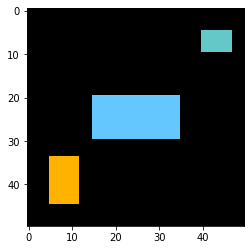

In [22]:
# 使用cv2.moments()提取一幅图像的特征
img = np.zeros([50,50,3],np.uint8)
img[34:45,5:12,0] = 0
img[34:45,5:12,1] = 178
img[34:45,5:12,2] = 255
img[20:30,15:35,0] = 255
img[20:30,15:35,1] = 200
img[20:30,15:35,2] = 100
img[5:10,40:47,0] = 200
img[5:10,40:47,1] = 200
img[5:10,40:47,2] = 100
img_show(img)

In [23]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# ret,binary = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

n = len(contours)
contoursImg = []
for i in range(n):
    temp = np.zeros(img.shape,dtype=np.uint8)
    contoursImg.append(temp)
    contoursImg[i] = cv2.drawContours(temp,contours,i,(255,255,255),1)


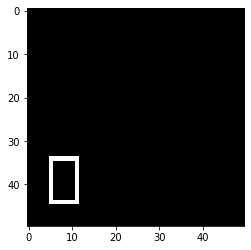

In [24]:
img_show(contoursImg[0])

In [25]:
# 观察各个轮廓的矩
for i in range(n):
    print('轮廓'+str(i)+'的矩：\n',cv2.moments(contours[i]))
print()
for i in range(n):
    print('轮廓'+str(i)+'的面积：',cv2.moments(contours[i])['m00'])

轮廓0的矩：
 {'m00': 60.0, 'm10': 480.0, 'm01': 2340.0, 'm20': 4020.0, 'm11': 18720.0, 'm02': 91760.0, 'm30': 35040.0, 'm21': 156780.0, 'm12': 734080.0, 'm03': 3617640.0, 'mu20': 180.0, 'mu11': 0.0, 'mu02': 500.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.05, 'nu11': 0.0, 'nu02': 0.1388888888888889, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
轮廓1的矩：
 {'m00': 171.0, 'm10': 4189.5, 'm01': 4189.5, 'm20': 107787.0, 'm11': 102642.75, 'm02': 103797.0, 'm30': 2892849.75, 'm21': 2640781.5, 'm12': 2543026.5, 'm03': 2599584.75, 'mu20': 5144.25, 'mu11': 0.0, 'mu02': 1154.25, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.1759259259259259, 'nu11': 0.0, 'nu02': 0.03947368421052631, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
轮廓2的矩：
 {'m00': 24.0, 'm10': 1032.0, 'm01': 168.0, 'm20': 44448.0, 'm11': 7224.0, 'm02': 1208.0, 'm30': 1917456.0, 'm21': 311136.0, 'm12': 51944.0, 'm03': 8904.0, 'mu20': 72.0, 'mu11': 0.0, 'mu02': 32.0, 'mu30': 0.0, 'mu21': 0.0, 'm

### 12.2.2 计算轮廓的面积：contourArea函数

In [26]:
# retVal = cv2.contourArea(contour[,oriented])
# retVal：面积返回值
# contour：轮廓
# oriented：布尔值，True时，返回值包含正负号，表示轮廓时顺时针还是逆时针，默认False，返回绝对值

In [27]:
area = cv2.contourArea(contours[0])
area

60.0

### 12.2.3 计算轮廓的长度：arcLength函数

In [28]:
# retVal = cv2.arcLength(curve,closed)
# retVal：轮廓长度（周长）
# curve：轮廓
# closed：布尔值，用来表示轮廓是否封闭，True表示封闭

In [29]:
lenth = cv2.arcLength(contours[0],1)
lenth

32.0

# 12.3 Hu矩

### 12.3.1 Hu矩函数

In [30]:
# Hu矩时归一化中心矩的线性组合
# Hu矩在图像旋转，缩放，平移等操作后，仍能保持矩的不变性，所以经常使用Hu矩来识别图像的特征

# opencv中使用函数cv2.HuMoments()可以得到Hu矩，该函数使用cv2.moments()函数的返回值作为参数，返回7个Hu矩值
# hu = cv2.HuMoments(m)
# hu：返回的Hu矩值
# m：由函数cv2.moments()计算得到的矩特征值

# 函数cv2.moments()返回的归一化中心矩中包含：
# 二阶Hu矩：nu20，nu11，nu02
# 三阶Hu矩：nu30，nu21,nu12,nu03
# 上述7个Hu矩的计算公式见数P248

In [31]:
# 验证h0=nu20+nu02
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
HuM1 = cv2.HuMoments(cv2.moments(gray)).flatten()

In [32]:
cv2.moments(gray)

{'m00': 57933.0,
 'm10': 1371489.0,
 'm01': 1453207.0,
 'm20': 38932719.0,
 'm11': 29820581.0,
 'm02': 41082723.0,
 'm30': 1238775489.0,
 'm21': 749517251.0,
 'm12': 752119809.0,
 'm03': 1254484777.0,
 'mu20': 6464487.126611777,
 'mu11': -4582219.048728704,
 'mu02': 4630086.595032193,
 'mu30': 11016839.90241623,
 'mu21': -10125331.603856832,
 'mu12': 9422605.501903772,
 'mu03': -8330011.525967836,
 'nu20': 0.0019261142211688352,
 'nu11': -0.00136528654190282,
 'nu02': 0.0013795488275044204,
 'nu30': 1.3637726980104254e-05,
 'nu21': -1.2534130405774098e-05,
 'nu12': 1.1664226984728026e-05,
 'nu03': -1.031170679963821e-05}

In [33]:
print(HuM1)

[ 3.30566305e-03  7.75476310e-06  1.20081552e-09  1.16212115e-09
  1.37214489e-18  3.22141949e-12 -4.32148909e-20]


In [34]:
print(HuM1[0])
print(cv2.moments(gray)["nu20"]+cv2.moments(gray)["nu02"])

0.003305663048673256
0.003305663048673256


In [35]:
# Hu矩之差：HuM1-HuM2

### 12.3.2 形状匹配

In [36]:
# 可以通过Hu矩来判断两个对象的一致性，如上面说的两个Hu的差
# 为更直观比较Hu矩值，opencv提供了函数cv2.matchShapes()对两个对象的Hu矩进行比较
# 这两个对象可以时轮廓，也可以时灰度值，不管是什么，该函数都会提前计算好对象的Hu矩值

# retVal = cv2.matchShapes(contour1,contour2,method,parameter)
# contour1：第一个轮廓或者灰度图像
# contour2：第二个轮廓或者灰度图像
# method：比较两个对象的Hu矩的方法：
# cv2.CONTOURS_MATCH_11
# cv2.CONTOURS_MATCH_12
# cv2.CONTOURS_MATCH_13
# paramter：应用于method的特定参数，为扩展参数，目前（截至opencv 4.1.0）暂不支持该参数，因此该值设置为0

In [37]:
# 使用函数cv2.matchShapes()计算不同图像的匹配度
o1 = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
o2 = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/log.jpg")
gray1 = cv2.cvtColor(o1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(o2,cv2.COLOR_BGR2GRAY)
ret,binary1 = cv2.threshold(gray1,127,255,cv2.THRESH_BINARY)
ret,binary2 = cv2.threshold(gray2,127,255,cv2.THRESH_BINARY)
contours1,hierarchy = cv2.findContours(binary1,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
contours2,hierarchy = cv2.findContours(binary2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours1[0]
cnt2 = contours2[0]
ret1 = cv2.matchShapes(cnt1,cnt1,1,0)
ret2 = cv2.matchShapes(cnt1,cnt2,1,0)
print("ret1:",ret1)
print("ret2:",ret2)

ret1: 0.0
ret2: 0.2810427321678761


In [38]:
# 从结果可看出：
# 同一幅图像的Hu矩是不变的，二者差值为0
# 相似的图像发生了平移，旋转，缩放后，cv2.matchShapes()返回值仍然比较接近
# 不相似的图像的返回值的差较大

# 12.4 轮廓拟合

In [39]:
# 在计算轮廓时可能并不需要实际的轮廓，而仅需要一个接近于轮廓的近似多边形，opencv提供了多种计算轮廓近似多边形的方法

### 12.4.1 矩形包围框

In [40]:
# 函数cv2.boundingRect()能够绘制轮廓的矩形边界
# retVal = cv2.boundingRect(array)
# retVal：返回的矩形边界的左上角顶点的坐标值及矩形宽，高
# array：轮廓，或灰度图像
# 该函数还可以是具有4个返回值的形式：
# x,y,w,h = cv2.boundingRect(array)

rect1: (16, 362, 137, 66)


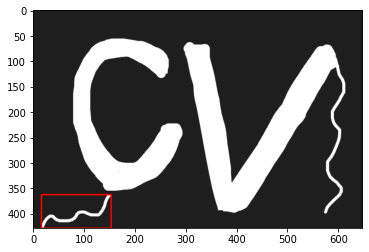

In [42]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
rect = cv2.boundingRect(contours[0])
x,y,w,h = rect
brect = np.array([[[x,y]],[[x+w,y]],[[x+w,y+h]],[[x,y+h]]])
cv2.drawContours(cv,[brect],-1,(0,0,255),2)
# cv = cv2.rectangle(cv,(x,y),(x+w,y+h),(0,0,255),5)
print("rect1:",rect)
img_show(cv)

### 12.4.2 最小包围矩形框

In [43]:
# 函数cv2.minAreaRect()构造一个面积最小的最小外接矩形
# retval = cv2.minAreaRect(points)
# retval：返回的矩形特征信息（最小外接矩形的中心(x,y)，(宽，高)，旋转角度）
# points：轮廓

# 注意，retval的结构不符合函数cv2.drawContours()参数要求
# 函数cv2.boxPoint()能将retval转换为符合要求的结构
# points = cv2.boxPoint(box)
# points：能用于cv2.drawContours()参数的轮廓点
# box：cv2.minAreaRect()计算的图像最小外接矩形框

rect: ((86.24761199951172, 401.01806640625), (34.16382598876953, 149.108154296875), 70.97439575195312)
points: [[ 10 409]
 [151 360]
 [162 392]
 [ 21 441]]


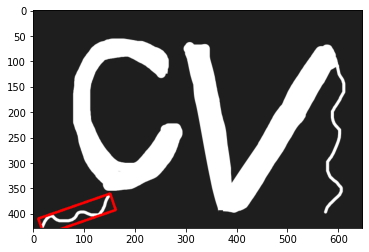

In [44]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

rect = cv2.minAreaRect(contours[0])
points = cv2.boxPoints(rect)
points = np.int0(points)  # 取整

cv2.drawContours(cv,[points],0,(0,0,255),3)
img_show(cv)
print("rect:",rect)
print("points:",points)

### 12.4.3 最小外包圆形

In [45]:
# 函数cv2.minEnclosingCircle()通过迭代算法，构造一个对象面积最小的最小外包圆形
# center,radius = cv2.minEnclosingCircle(points)
# ceter：最小外包圆形的中心
# radius：最小外包圆形的半径
# points：轮廓

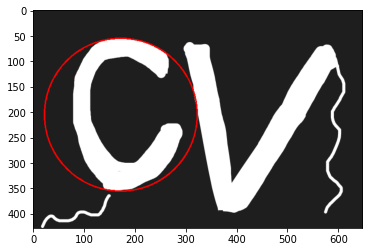

In [46]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

(x,y),radius = cv2.minEnclosingCircle(contours[2])
center = (int(x),int(y))
radius = int(radius)

cv2.circle(cv,center,radius,(0,0,255),2)
img_show(cv)

### 12.4.4 最优拟合椭圆

In [47]:
# 函数cv2.fitEllipse()可以构造最优拟合椭圆
# retval = cv2.fitEllipse(points)
# retval：RotatedRect类型值，这是因为该函数返回的是拟合椭圆的外接矩形，
# retval包含外接矩形的质心，宽，高，旋转角度等信息，这些信息正好与椭圆中的中心点，轴长度，旋转角度等信息吻合
# points：轮廓

ellipse: ((183.6658172607422, 200.66261291503906), (201.35049438476562, 285.8033752441406), 174.46080017089844)


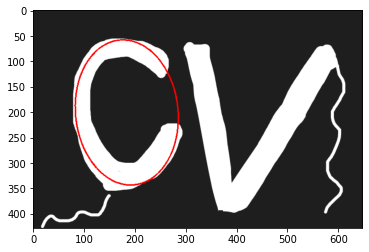

In [48]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

ellipse = cv2.fitEllipse(contours[2])
cv2.ellipse(cv,ellipse,(0,0,255),2)
img_show(cv)
print("ellipse:",ellipse)

### 12.4.5 最优拟合直线

In [49]:
# line = cv2.fitLine(points,distType,param,reps,aeps)
# line：返回值
# points：轮廓
# distType：距离类型，要使输入点到拟合直线的距离之和最小，类型见书P261
# cv2.DIST_USER
# cv2.DIST_L1
# cv2.DIST_L2
# cv2.DIST_C
# cv2.DIST_L12
# cv2.DIST_FAIR
# cv2.DIST_WELSCH
# cv2.DIST_HUBER
# param：距离参数，与选的距离类型有关，为0时，函数自动选择最优值
# reps：拟合直线所需要的径向精度，通常设为0.01
# aeps：拟合直线所需要的角度精度，通常设为0.01

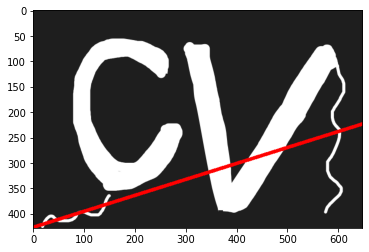

In [50]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

h,w = cv.shape[:2]
[vx,vy,x,y] = cv2.fitLine(contours[0],cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx)+y)
righty = int(((w-x)*vy/vx)+y)
cv2.line(cv,(w-1,righty),(0,lefty),(0,0,255),5)
img_show(cv)

### 12.4.6 最小外包三角形

In [51]:
# retval,triangle = cv2.minEnclosingTriangle(points)
# retval：最小外包三角形面积
# triangle：最小外包三角形三个顶点集
# points：轮廓

<ipython-input-52-92df7a9db532>:8: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.line(cv,tuple(trgl[i][0]),tuple(trgl[(i+1)%3][0]),(0,0,255),3)


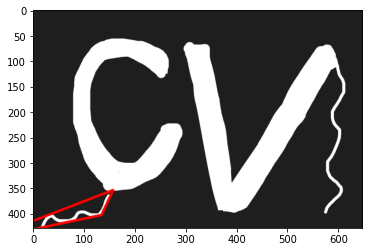

In [52]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

area,trgl = cv2.minEnclosingTriangle(contours[0])
for i in range(0,3):
    cv2.line(cv,tuple(trgl[i][0]),tuple(trgl[(i+1)%3][0]),(0,0,255),3)
img_show(cv)

### 12.4.7 逼近多边形

In [53]:
# approxCurve = cv2.approxPolyDP(curve,epsilon,closed)
# approxCurve：逼近多边形的点集
# curve：轮廓
# epsilon：精度，原始轮廓的边界点与逼近多边形边界间的最大距离
# closed：布尔值，True：逼近多边形是封闭的，反之

# cv2.approxPolyDP()采用的是Douglas-Peucker算法（DP算法）：
# 该算法线找到轮廓中距离最远的亮点，并将亮点连接
# 接着，在轮廓上找到一个距离当前直线最远的点，并将该点与原直线连成封闭的多边形，此时得到三角形
# 迭代上述过程，将新找到的点加入结果中，当轮廓上所有点到多边形的距离都小于epsilon时停止

是否为凸多边形： False


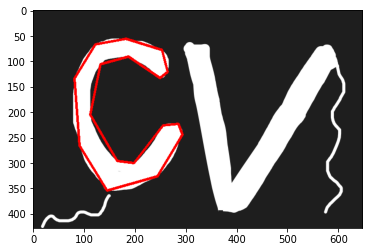

In [54]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

epsilon = 0.01*cv2.arcLength(contours[2],True)
approx = cv2.approxPolyDP(contours[2],epsilon,True)
cv2.drawContours(cv,[approx],0,(0,0,255),3)

print("是否为凸多边形：",cv2.isContourConvex(approx))  # 判断是否为凸形的
img_show(cv)

# 12.5 凸包

In [55]:
# 逼近多边形是轮廓的高度近似
# 凸包与逼近多边形很像，它是物体最外层的凸多边形，它完全包括原有轮廓，并且仅由轮廓上的点构成的多边形
# 凸包的每一处都是凸的，即在凸包内连接任意亮点的直线都在凸包内，任意连续三个点的内角小于180度

### 12.5.1 获取凸包

In [56]:
# opencv提供函数cv2.convexHull()获取轮廓的凸包
# hull = cv2.convexHull(points[,clockwise[,returnPoints]])
# hull：返回凸包的角点
# points：轮廓
# clockPoints：布尔值，True时，凸包角点按顺时针方向排列，反之
# returnPoints：布尔值，默认True，返回凸包角点的x/y轴坐标，False时，返回轮廓中凸包角点的索引

In [58]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

hull1 = cv2.convexHull(contours[2])
hull2 = cv2.convexHull(contours[2],returnPoints=False)
# print("hull1:",hull1)
# print("hull2:",hull2)

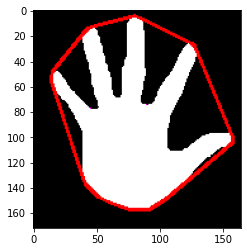

In [59]:
hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
gray = cv2.cvtColor(hand,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

hull = cv2.convexHull(contours[0])
cv2.polylines(hand,[hull],True,(0,0,255),2)
img_show(hand)

### 12.5.2 凸缺陷

In [60]:
# 1.测试轮廓是否是凸形的
# 凸包与轮廓之间的部分称为凸缺陷
# opencv中用函数cv2.convexityDefects()获取凸缺陷

# convexityDefects = cv2.convexityDefects(contour,convexhull)
# convexityDefects：凸缺陷点集，它是一个数组，每一行包含的值是：[起点，终点，轮廓上距离凸包最远的点，最远点到凸包的近似距离]
# contour：轮廓
# convexhull：凸包
# 注意，cv2.convexityDefects()要使用凸包作参数，在查找该凸包时，cv2.convexHull()的参数returnPoints的值必须是False

是否为凸多边形： True


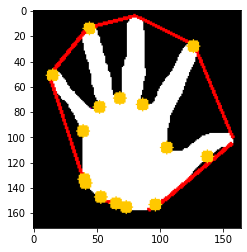

In [61]:
hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
gray = cv2.cvtColor(hand,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

hul = cv2.convexHull(contours[0])
hull = cv2.convexHull(contours[0],returnPoints=False)
defects = cv2.convexityDefects(contours[0],hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(contours[0][s][0])
    end = tuple(contours[0][e][0])
    far = tuple(contours[0][f][0])
    cv2.line(hand,start,end,(0,0,255),2)
    cv2.circle(hand,far,5,(0,200,255),-1)

print("是否为凸多边形：",cv2.isContourConvex(hul))  # 判断是否为凸形的
img_show(hand)

In [62]:
# 2.点到轮廓的距离
# 在opencv中用函数cv2.pointPolygonTest()来计算点到多边形（轮廓）的最短距离（也是垂直距离）：

# retval = cv2.pointPolygonTest(contour,pt,measureDist)
# contour：轮廓
# pt：点
# neasureDist：布尔值，表示距离的判断方式。
# 当值为Ture：计算点到轮廓的距离，若点在轮廓外部，返回负数；若点在轮廓上，返回0；若点在轮廓内部，返回正数
# 当值为False：不计算距离，只返回-1，0，1中的一个值，表示点相对于轮廓的位置关系

distA: 44.92307692307693
distB: -16.97056274847714
distC: -0.0


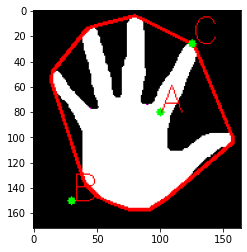

In [63]:
hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")

# 获取轮廓
gray = cv2.cvtColor(hand,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# 获取凸包
hull = cv2.convexHull(contours[0])
hand = cv2.cvtColor(hand,cv2.COLOR_BGR2RGB)
cv2.polylines(hand,[hull],1,(0,0,255),2)

# 内部点A到轮廓距离
distA = cv2.pointPolygonTest(hull,(100,80),True)
cv2.circle(hand,(100,80),3,(0,255,0),-1)
cv2.putText(hand,"A",(100,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)

# 外部点B到轮廓距离
distB = cv2.pointPolygonTest(hull,(30,150),True)
cv2.circle(hand,(30,150),3,(0,255,0),-1)
cv2.putText(hand,"B",(30,150),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)

# 轮廓上点C到轮廓距离
distC = cv2.pointPolygonTest(hull,(125,26),True)
cv2.circle(hand,(125,26),3,(0,255,0),-1)
cv2.putText(hand,"C",(125,26),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)

print("distA:",distA)
print("distB:",distB)
print("distC:",distC)
img_show(hand)

# 12.6 利用形状场景算法比较轮廓

In [64]:
# 用矩形表形状是一种非常有效的方法，但现在有了更有效的方法。
# 从opencv3开始，有了专有模块shape，该模块中的形状场景算法能够更高效地比较形状

### 12.6.1 计算形状场景距离

In [65]:
# opencv提供了使用“距离”作为形状比较的度量标准。这是因为形状之间的差异值与距离有相似之处
# opencv提供了函数cv2.createShapeContextDistanceExtractor()用于计算形状场景距离
# 其使用的“形状上下文算法”在计算距离时，在每个点上附加一个“形状上下文”描述符，让每个点都能捕获剩余点相对于它的分布特征，从而提供全局鉴别特征

# retval = cv2.createShapeContextDistanceExtractor([,nAngularBins[,nRadialBins[,innerRadius[,outerRadius[,iterations[,comparer[,transformer]]]]]]])
# retval：返回结果，该结果可以通过函数cv2.ShapeDistanceExtractor.computeDistance()计算李青哥不同形状之间的距离：
# distance = cv2.ShapeDistanceExtractor.computeDistance(contour1,contour2)  # 式中contour1和contour2是不同的轮廓
# nAngularBins：为形状匹配中使用的形状上下问文描述符建立的角容器的数量
# nRadialBins：为形状匹配中使用的形状上下问文描述符建立的径向容器的数量
# innerRadius：形状上下文描述符的内半径
# outerRadius：形状上下文描述符的外半径
# iterations：迭代次数
# comparer：直方图代价提取算子。该函数使用了直方图代价提取仿函数，可以直接采用直方图代价提取仿函数的算子作为参数
# transformer：形状变换参数

0.0008787415572442114
1.6731972694396973
1236.7515869140625


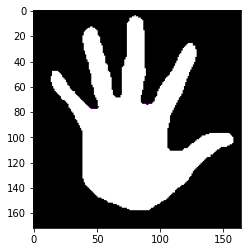

In [72]:
# 手图像轮廓
hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
gray = cv2.cvtColor(hand,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours[0]

# 手图像轮廓（缩放翻转）
hand2 = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
h,w = hand2.shape[:2]
size = (int(h*0.9),int(w*0.7))
hand2 = cv2.resize(hand2,size)
hand2 = cv2.flip(hand2,-1)
gray = cv2.cvtColor(hand2,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt2 = contours[0]

# cv图像轮廓
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt3 = contours[2]

# 构造距离提取算子
sd = cv2.createShapeContextDistanceExtractor()  # 需按装opencv-contrib扩展

# 计算距离
distance1 = sd.computeDistance(cnt1,cnt1)
distance2 = sd.computeDistance(cnt1,cnt2)
distance3 = sd.computeDistance(cnt1,cnt3)

print(distance1)
print(distance2)
print(distance3)
img_show(hand)

# 相同图片之间的形状场景距离为0
# 相似图片之间的形状场景距离较小
# 不同图片之间的形状场景距离较大

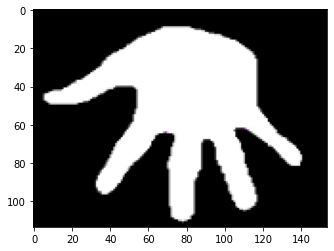

In [73]:
img_show(hand2)

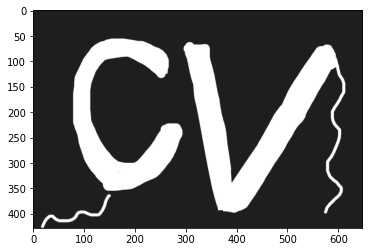

In [74]:
img_show(cv)

### 12.6.2 计算 Huasdoff 距离

In [75]:
# Hausdoff距离的计算方法：
# 1）针对图像A内的每一个点，寻找其距离图像B的最短距离，将这个最短距离作为Hausdorff直接距离D1
# 2）针对图像B内的每一个点，寻找其距离图像A的最短距离，将这个最短距离作为Hausdorff直接距离D2
# 3）将D1，D2中较大者作为Hausdorff距离
# 公式表示：
# H(A,B) = max(h(A,B),h(B,A))
# h(A,B) = maxmin||a-b||  # a∊A,b∊B,||.||表示a和b的某种范数，通常是欧式距离

# opencv提供函数cv2.createHausdorffDistanceExtractor()来计算Hausdorff距离：
# retval = cv2.createHausdorffDistanceExtractor([,distanceFlag[,rankProp]])
# retval：
# distance：距离标记，可选
# rankProp：比例值，0-1之间，可选

In [77]:
# 计算不同图像的Hausdoff距离
# 手图像轮廓
hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
gray = cv2.cvtColor(hand,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours[0]

# 手图像轮廓（缩放翻转）
hand2 = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
h,w = hand2.shape[:2]
size = (int(h*0.9),int(w*0.7))
hand2 = cv2.resize(hand2,size)
hand2 = cv2.flip(hand2,-1)
gray = cv2.cvtColor(hand2,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt2 = contours[0]

# cv图像轮廓
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt3 = contours[2]

# 构造距离提取算子
hd = cv2.createShapeContextDistanceExtractor()

# 计算距离
d1 = hd.computeDistance(cnt1,cnt1)
d2 = hd.computeDistance(cnt1,cnt2)
d3 = hd.computeDistance(cnt1,cnt3)

print(distance1)
print(distance2)
print(distance3)

# 相同图片之间的Hausdorff距离为0
# 相似图片之间的Hausdorff距离较小
# 不同图片之间的Hausdorff距离较大

0.0008787415572442114
1.6731972694396973
1236.7515869140625


# 12.7 轮廓的特征值

### 12.7.1 宽高比

0.7190635451505016


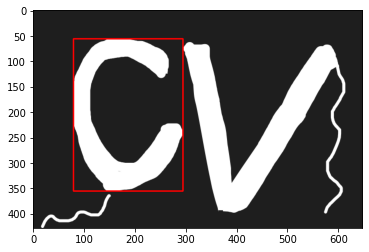

In [79]:
# 可以使用宽高比来描述轮廓
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(cv,(x,y),(x+w,y+h),(0,0,255),2)
aspectRatio = float(w)/h

print(aspectRatio)
img_show(cv)

### 12.7.2 Extent

0.37654196157735087


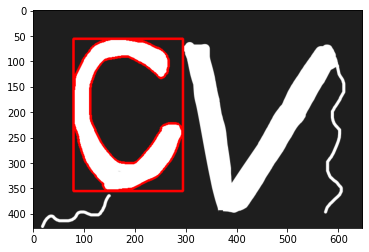

In [94]:
# 可以使用轮廓面积与矩形边界（矩形包围框，矩形轮廓）面积之比Extent来描述图像及其轮廓特征
# Extent = 轮廓面积/矩形边界面积
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

x,y,w,h = cv2.boundingRect(cnt)
cv2.drawContours(cv,[cnt],-1,(0,0,255),3)
cv2.rectangle(cv,(x,y),(x+w,y+h),(0,0,255),3)
cntArea = cv2.contourArea(cnt)
rectArea = w*h
extent = float(cntArea)/rectArea

print(extent)
img_show(cv)

### 12.7.3 Solidity

0.4749440803673037


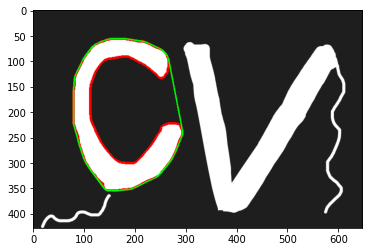

In [93]:
# 可以使用轮廓面积与凸包面积之比Solidity来衡量图像，轮廓及凸包的特征：
# Solidity = 轮廓面积/凸包面积
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

x,y,w,h = cv2.boundingRect(cnt)
cv2.drawContours(cv,[cnt],-1,(0,0,255),3)
cntArea = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hullArea = cv2.contourArea(hull)
cv2.polylines(cv,[hull],True,(0,255,0),2)
solidity = float(cntArea)/hullArea

print(solidity)
img_show(cv)

### 12.7.4 等效直径

175.55636251602888


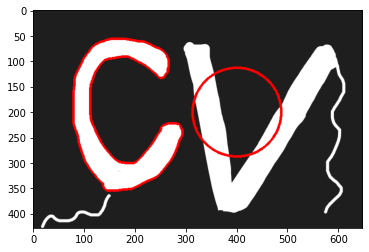

In [92]:
# 可以用等效直接衡量轮廓的特征值，该值是与轮廓面积相等的圆形的直径：
# 等效直径 = √(4*轮廓面积/𝜋）
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

cv2.drawContours(cv,[cnt],-1,(0,0,255),3)
cntArea = cv2.contourArea(cnt)
equipDiameter = np.sqrt(4*cntArea/np.pi)
cv2.circle(cv,(400,200),int(equipDiameter/2),(0,0,255),3)

print(equipDiameter)
img_show(cv)

### 12.7.5 方向

ellipse: ((183.6658172607422, 200.66261291503906), (201.35049438476562, 285.8033752441406), 174.46080017089844)


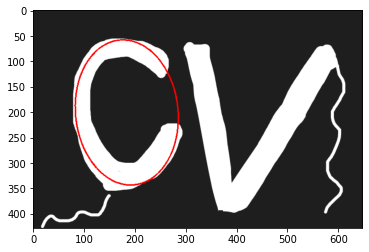

In [88]:
# opencv提供的cv2.fitEllipse()可以用来构造最优拟合椭圆，还可以在返回值内分别返回椭圆的中心点，轴长，旋转角度等信息
# 使用这种形式，能够更直观地获取椭圆的方向等信息
# (x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
# (x,y)：椭圆中心点
# (MA,ma)：椭圆水平方向轴和垂直方向轴长度
# angle：椭圆旋转角度

cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

ellipse = cv2.fitEllipse(cnt)
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
cv2.ellipse(cv,ellipse,(0,0,255),2)

print("ellipse:",ellipse)
img_show(cv)

### 12.7.6 掩模和像素点

In [89]:
# 有时我们希望获取某个对象的掩模图像及其对应的点
# cv2.drawContours()的轮廓宽度参数thickness设置为-1，即可获取特定对象的实心轮廓，即特定对象的掩模
# 另外我们还希望获取轮廓（实心、空心）像素点的具体位置信息
# 一半轮廓内的像素点是非0像素点，两种方式获取：1.Numpy数组；2.opencv函数

In [91]:
# 1.使用Numpy函数获取轮廓像素点
# numpy.nonzero()函数找出数组内非0元素位置，但是其返回值是将行、列分别显示的
a = [[0,0,0,1,0],
    [0,0,1,0,1],
    [0,0,1,1,1],
    [1,0,0,0,0],
    [1,0,0,0,1]]

# 返回a内非0元素位置：
nonzero = np.nonzero(a)

# 使用numpy.transpose()函数处理上述值，得到这些点（x,y）形式的坐标
transpose = np.transpose(nonzero)

print("nonzero:\n",nonzero)
print("transpose:\n",transpose)

nonzero:
 (array([0, 1, 1, 2, 2, 2, 3, 4, 4]), array([3, 2, 4, 2, 3, 4, 0, 0, 4]))
transpose:
 [[0 3]
 [1 2]
 [1 4]
 [2 2]
 [2 3]
 [2 4]
 [3 0]
 [4 0]
 [4 4]]


[[ 56 152]
 [ 56 153]
 [ 56 154]
 ...
 [354 165]
 [354 166]
 [354 167]]


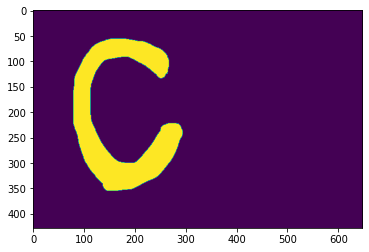

In [98]:
cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))

print(pixelpoints)
img_show(mask)

[[[152  56]]

 [[153  56]]

 [[154  56]]

 ...

 [[165 354]]

 [[166 354]]

 [[167 354]]]


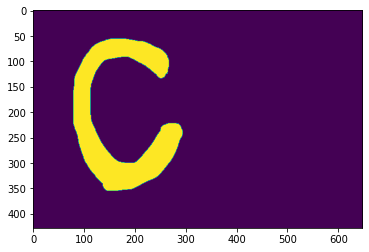

In [100]:
# 2.使用opencv函数获取轮廓点
# opencv提供了函数cv2.findNonZero()用于查找非零元素的索引：
# idx = cv2.findNonZero(src)
# idx：非零元素索引位置，（列，行）
# src：要查找的图片

cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
idx = cv2.findNonZero(mask)

print(idx)
img_show(mask)

### 12.7.7 最大值和最小值及它们的位置

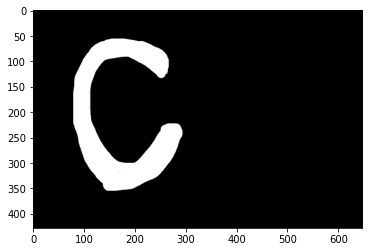

In [102]:
# opencv提供了函数cv2.minMaxLoc()用于在指定对象内查找最大值，最小值，及其位置：
# minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(imgray,mask=mask)
# 返回值分别是：
# 最小值，最大值，最小值位置，最大值位置
# 参数：
# imgray：大通道图像
# mask：掩模。通过使用掩模图像，可以得到掩模指定区域内的最值信息

cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

# 利用掩模获取感兴趣区域的最值
mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask,[cnt],-1,255,-1)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(gray,mask=mask)

# 使用掩模获取感兴趣区域并显示
maskCv = np.zeros(cv.shape,np.uint8)
cv2.drawContours(maskCv,[cnt],-1,(255,255,255),-1)
loc = cv2.bitwise_and(cv,maskCv)
img_show(loc)

### 12.7.8 平均颜色及平均灰度

meanVal: (252.52199886978283, 252.52199886978283, 252.52199886978283, 0.0)


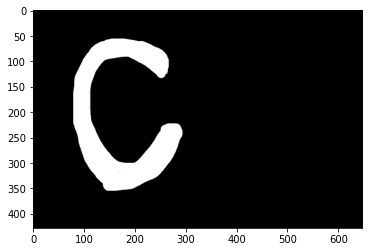

In [104]:
# opencv提供了函数cv2.mean()用于计算一个对象的平均颜色或平均灰度：
# meanVal = cv2.mean(im,mask=mask)
# meanVal：返回的平均值
# im：原始图像
# mask：掩模。构造mean使用的掩模必须是单通道的

cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,(255,255,255),-1)
meanVal = cv2.mean(cv,mask=mask)  # mask是一个区域，所以必须是单通道的
print("meanVal:",meanVal)

# 使用掩模获取感兴趣区域并显示
maskCv = np.zeros(cv.shape,np.uint8)
cv2.drawContours(maskCv,[cnt],-1,(255,255,255),-1)
loc = cv2.bitwise_and(cv,maskCv)
img_show(loc)

### 12.7.9 极点

leftmost: (79, 157)
rightmost: (293, 244)
topmost: (152, 56)
bottommost: (145, 354)


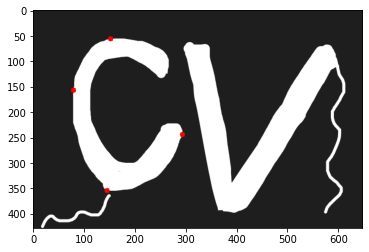

In [110]:
# 有时我们希望获取某个对象内的极值点，例如最左端，最右端，最上端，最下端四个点
# opencv提供了相应函数来获取这些点
# leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
# rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
# topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
# bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/cv.png")
gray = cv2.cvtColor(cv,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,100,256,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[2]

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv2.circle(cv,leftmost,5,(0,0,255),-1)
cv2.circle(cv,rightmost,5,(0,0,255),-1)
cv2.circle(cv,topmost,5,(0,0,255),-1)
cv2.circle(cv,bottommost,5,(0,0,255),-1)

print("leftmost:",leftmost)
print("rightmost:",rightmost)
print("topmost:",topmost)
print("bottommost:",bottommost)
img_show(cv)